# Top 500 Novels Metadata Analysis

# Metadata Analysis

### By Aashna Sheth

Let’s start by reading our data into a pandas dataframe. A pandas
dataframe is a structure used to hold file data. This structure has
efficient methods used for manipulating and visualizing data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/refs/heads/main/datasets/top-500-novels/top-500-novels-metadata_2025-01-11.csv", sep=',', header=0, low_memory=False)

Now, we can answer various questions using this structure, which we’ve
named `df`.

For example, let’s look at counts related to author gender and name.

In [2]:
df["author_gender"].value_counts(dropna=False)

author_gender
male      355
female    145
Name: count, dtype: int64

We see that about 70% of authors on the list are male and 30% are
female.

Some authors appear multiple times on the list. Let’s see which authors
are most represented in the list.

In [3]:
df["author"].value_counts(dropna=False).head(10)

author
John Grisham            19
Charles Dickens         15
John Steinbeck           8
C.S. Lewis               8
Stephen King             7
Nicholas Sparks          7
Laura Ingalls Wilder     7
J.K. Rowling             7
Ernest Hemingway         5
James Patterson          5
Name: count, dtype: int64

Next, we can delve into some visualization work to understand where
authors are from and what timeframe of publication is most represented
in the top 500 list.

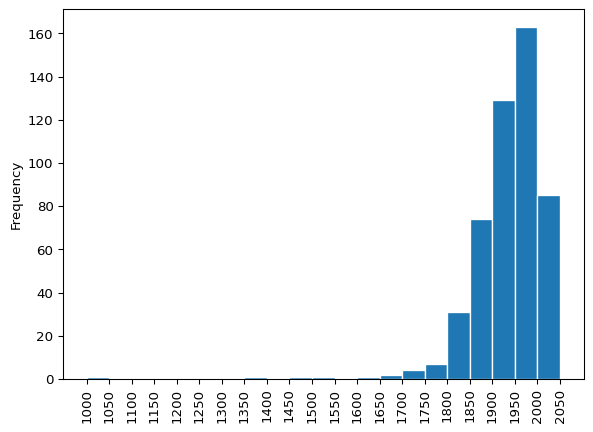

In [4]:
import numpy as np

bins = np.arange(1000, 2060, 50)
bars = df['pub_year'].plot.hist(bins=bins, edgecolor='w')
plt.xticks(rotation='vertical');
plt.xticks(bins);

We can see that most books on the list were published between 1950 and
2000. Let’s take a look at information about the oldest and newest books
on the list.

In [5]:
from IPython.display import display

print("Oldest Book(s):")
display(df[df["pub_year"]==df["pub_year"].min()])
print("Newest Book(s):")
display(df[df["pub_year"]==df["pub_year"].max()])

Oldest Book(s):

1 rows × 29 columns

Newest Book(s):

2 rows × 29 columns

Let’s take a look at where the authors are from!

In [6]:
df["author_nationality"].value_counts().head(5)

author_nationality
US    257
GB    149
FR     27
RU     10
DE     10
Name: count, dtype: int64

------------------------------------------------------------------------

Finally, let’s unpack the differences between the Goodreads ratings and
the top 500 ratings. First, we should think about how we want to compare
the two lists. Given that we have listed rankings by average rating and
number of ratings, which metric would be better to use? Would we want to
create another metric?

For our purposes, we decided to use number of ratings, instead of
average rating, as OCLC measures popularity by number of holdings, not
how much patrons say they enjoy reading the books.

In [7]:
def top_5_comparison(col_name):
  print(df[["title", "author", "top_500_rank", col_name]].head(5))

  sorted = df.sort_values(by=[col_name])
  print(sorted[["title", "author", "top_500_rank", col_name]].head(5))

top_5_comparison("gr_num_ratings_rank")

                                title                  author  top_500_rank  \
0                         Don Quixote     Miguel de Cervantes             1   
1    Alice's Adventures in Wonderland           Lewis Carroll             2   
2  The Adventures of Huckleberry Finn              Mark Twain             3   
3        The Adventures of Tom Sawyer              Mark Twain             4   
4                     Treasure Island  Robert Louis Stevenson             5   

   gr_num_ratings_rank  
0                  211  
1                  133  
2                   68  
3                   88  
4                  145  
                                     title               author  top_500_rank  \
44   Harry Potter and the Sorcerer's Stone         J.K. Rowling            45   
172                       The Hunger Games      Suzanne Collins           173   
131                               Twilight      Stephenie Meyer           132   
28                   To Kill a Mockingbird         

Above you can see that the Goodreads rankings and the top 500 rankings
aren’t very aligned! What factors affect popularity on Goodreads
compared to OCLC?

In [8]:
import math

def print_rankings(d, col_name):
    rank_B = d[col_name]
    rank_A = d["top_500_rank"]
    title = d["title"]
    points_moved = 0
    if (math.isnan(rank_B)):
      points_moved = 501
    else:
      if rank_B > int(rank_A):
          points_moved = rank_B - rank_A
          print(f"\u001b[31m ▼ -{int(points_moved)} {title}")
      elif rank_B < rank_A:
          points_moved = rank_A - rank_B
          print(f"\u001b[32m ▲ +{int(points_moved)} {title}")
      else:
          print(f"\u001b[30m ● {int(points_moved)} {title}")
    d["points_moved"] = int(points_moved)
    return d

df = df.apply(lambda d: print_rankings(d, "gr_num_ratings_rank"), axis=1)

Let’s see which novels had the most movement up or down!

In [9]:
sorted = df.sort_values(by=['points_moved'])
print(sorted[["title", "author", "points_moved", "top_500_rank", "gr_num_ratings_rank"]].head(10).to_string(index=False))

                        title                   author  points_moved  top_500_rank  gr_num_ratings_rank
 The Winter of Our Discontent           John Steinbeck             0           397                  397
Little House In the Big Woods     Laura Ingalls Wilder             1           214                  213
          Pride and Prejudice              Jane Austen             2             6                    8
                 First Family           David Baldacci             3           400                  403
            The Little Prince Antoine de Saint-Exupéry             4            35                   39
                  Howards End             E.M. Forster             4           340                  336
              Call It Courage         Armstrong Sperry             5           480                  475
       The Incredible Journey          Sheila Burnford             5           387                  392
                      Rebecca        Daphne Du Maurier          

In [10]:
sorted = df.sort_values(by=['points_moved'], ascending=False)
print(sorted[["title", "author", "points_moved", "top_500_rank", "gr_num_ratings_rank"]].head(10).to_string(index=False))

                                      title           author  points_moved  top_500_rank  gr_num_ratings_rank
               20,000 Leagues Under the Sea      Jules Verne           444            37                  481
     Harry Potter and the Half-Blood Prince     J.K. Rowling           429           447                   18
                        The Sea of Monsters     Rick Riordan           419           495                   76
                     The Vicar of Wakefield Oliver Goldsmith           405            80                  485
                         Looking for Alaska       John Green           403           456                   53
                                       Room    Emma Donoghue           398           499                  101
Miss Peregrine's Home for Peculiar Children     Ransom Riggs           384           453                   69
                            Deception Point        Dan Brown           378           500                  122
          

Above we see that Steinbeck’s “The Winter of Our Discontent”, stayed at
the same ranking of 397. Pride and Prejudice remained quite high as
well.

20k Leagues under the sea dropped the most, from rank 37 in the top 500
list, to rank 481 in the goodreads list! Harry Potter and The Sea of
Monsters rose up the most.

In [11]:
df['points_moved'].mean()

np.float64(137.016)

------------------------------------------------------------------------

Let’s take a look at some of these metrics for rankings based on number
of editions and total holdings.

PearsonRResult(statistic=np.float64(0.3089825159300637), pvalue=np.float64(1.601761116200545e-12))
PearsonRResult(statistic=np.float64(0.7642639335763275), pvalue=np.float64(5.6541076909547544e-96))
PearsonRResult(statistic=np.float64(0.6985608812420623), pvalue=np.float64(1.1165447422670264e-73))

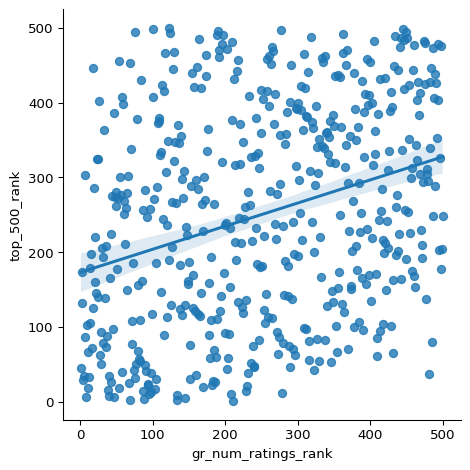

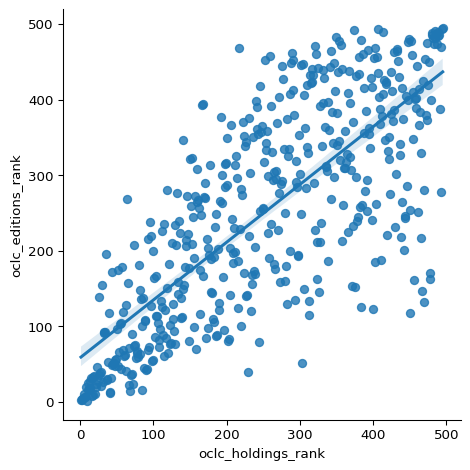

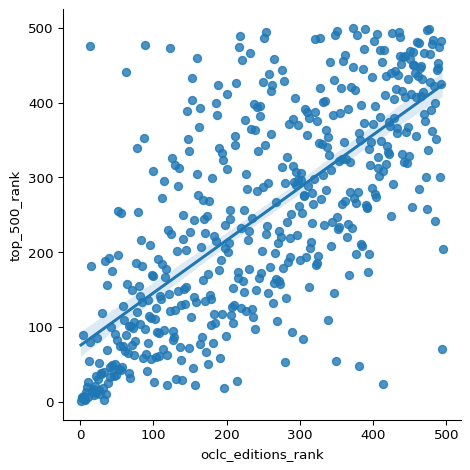

In [12]:
import pandas as pd
import seaborn as sns
from scipy import stats
# inspired by: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

sns.lmplot(x="gr_num_ratings_rank", y="top_500_rank", data=df)
print(stats.pearsonr(df['gr_num_ratings_rank'], df['top_500_rank']))

sns.lmplot(x="oclc_holdings_rank", y="oclc_editions_rank", data=df)
dropped_df = df[df.oclc_editions_rank.notna() & df.oclc_holdings_rank.notna()]
print(stats.pearsonr(dropped_df['oclc_holdings_rank'], dropped_df['oclc_editions_rank']))

sns.lmplot(x="oclc_editions_rank", y="top_500_rank", data=df)
dropped_df = df[df.oclc_editions_rank.notna()]
print(stats.pearsonr(dropped_df['oclc_editions_rank'], dropped_df['top_500_rank']))

In [13]:
df = df.apply(lambda d: print_rankings(d, "oclc_editions_rank"), axis=1)

In [14]:
df = df[df["points_moved"] <= 500]
top_5_comparison("oclc_editions_rank")

                                title                  author  top_500_rank  \
0                         Don Quixote     Miguel de Cervantes             1   
1    Alice's Adventures in Wonderland           Lewis Carroll             2   
2  The Adventures of Huckleberry Finn              Mark Twain             3   
3        The Adventures of Tom Sawyer              Mark Twain             4   
4                     Treasure Island  Robert Louis Stevenson             5   

   oclc_editions_rank  
0                 1.0  
1                33.0  
2                 6.0  
3                 7.0  
4                 2.0  
                  title                  author  top_500_rank  \
0           Don Quixote     Miguel de Cervantes             1   
4       Treasure Island  Robert Louis Stevenson             5   
5   Pride and Prejudice             Jane Austen             6   
88           Persuasion             Jane Austen            89   
7             Jane Eyre        Charlotte Brontë         

In [15]:
df['points_moved'].mean()
smaller_df = df.head(10)
smaller_df['points_moved'].mean()

np.float64(7.7)

------------------------------------------------------------------------

In [16]:
df = df.apply(lambda d: print_rankings(d, "oclc_holdings_rank"), axis=1)

In [17]:
top_5_comparison("oclc_holdings_rank")

                                title                  author  top_500_rank  \
0                         Don Quixote     Miguel de Cervantes             1   
1    Alice's Adventures in Wonderland           Lewis Carroll             2   
2  The Adventures of Huckleberry Finn              Mark Twain             3   
3        The Adventures of Tom Sawyer              Mark Twain             4   
4                     Treasure Island  Robert Louis Stevenson             5   

   oclc_holdings_rank  
0                 9.0  
1                18.0  
2                 6.0  
3                 7.0  
4                 1.0  
                  title                  author  top_500_rank  \
4       Treasure Island  Robert Louis Stevenson             5   
5   Pride and Prejudice             Jane Austen             6   
88           Persuasion             Jane Austen            89   
7             Jane Eyre        Charlotte Brontë             8   
6     Wuthering Heights            Emily Brontë         

In [18]:
df['points_moved'].mean()
smaller_df = df.head(10)
smaller_df['points_moved'].mean()

np.float64(4.9)

Comparing the average points of movement between the top 500 and 3 other
ranking lists, we can see that the novels moved the least when compared
to the number of holdings ranking (45 pts). Novels were 2x more likely
to move positions when compared to the number of editions ranking (82
pts) and 3x more likely to move when compared to Goodreads rankings (137
pts).